In [11]:

import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
import matplotlib.dates as mdates 
from copy import deepcopy

In [12]:
df = pd.read_csv('us_change.csv')
df.head(10)

,Quarter,Consumption,Income,Production,Savings,Unemployment
0,1970 Q1,0.618566,1.044801,-2.452486,5.299014,0.9
1,1970 Q2,0.451984,1.225647,-0.551459,7.789894,0.5
2,1970 Q3,0.872872,1.585154,-0.358652,7.403984,0.5
3,1970 Q4,-0.271848,-0.239545,-2.185691,1.169898,0.7
4,1971 Q1,1.901345,1.975925,1.909764,3.535667,-0.1
5,1971 Q2,0.914877,1.445909,0.901570,5.874764,-0.1
6,1971 Q3,0.794110,0.521149,0.308031,-0.406235,0.1
7,1971 Q4,1.645633,1.159176,2.291362,-1.486259,0.0
8,1972 Q1,1.311190,0.456857,4.154295,-4.291972,-0.2
9,1972 Q2,1.885778,1.033389,1.888673,-4.692196,-0.1


C:\Users\rodri\AppData\Local\Temp\ipykernel_12752\1294795107.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df_copy['Quarter'] = pd.to_datetime(df_copy['Quarter'].str.replace(' ', '-'))


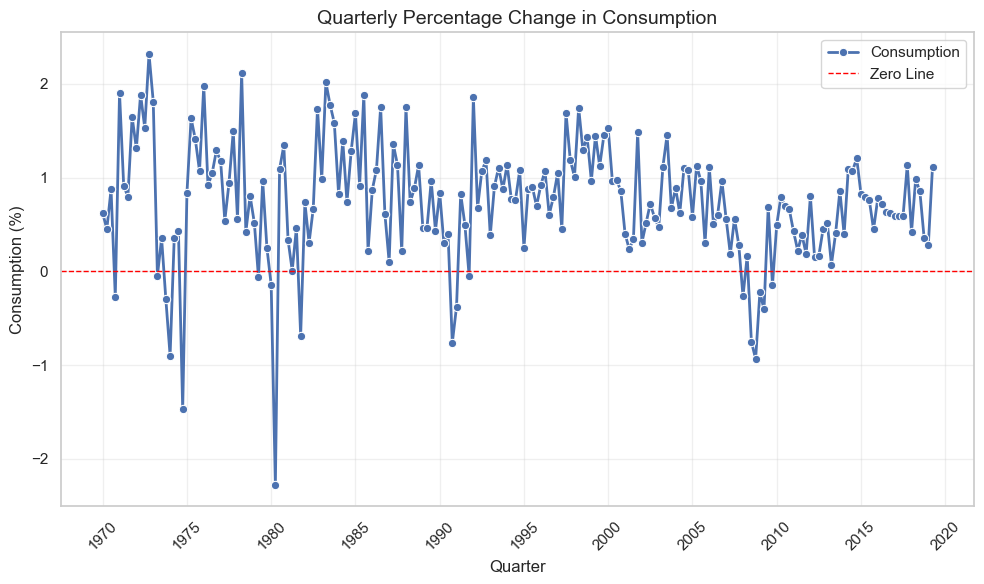

In [13]:
df_copy = deepcopy(df)
df_copy['Quarter'] = pd.to_datetime(df_copy['Quarter'].str.replace(' ', '-'))

plt.figure(figsize=(10, 6))
sns.lineplot(x=df_copy['Quarter'], y=df_copy['Consumption'], marker='o', linewidth=2, label='Consumption')
plt.axhline(0, color='red', linestyle='--', linewidth=1, label='Zero Line')

plt.title('Quarterly Percentage Change in Consumption', fontsize=14)
plt.xlabel('Quarter', fontsize=12)
plt.ylabel('Consumption (%)', fontsize=12)
plt.xticks(rotation=45)
plt.grid(alpha=0.3)
plt.legend()

plt.gca().xaxis.set_major_locator(mdates.YearLocator(base=5))  
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y'))

plt.tight_layout()
plt.show()

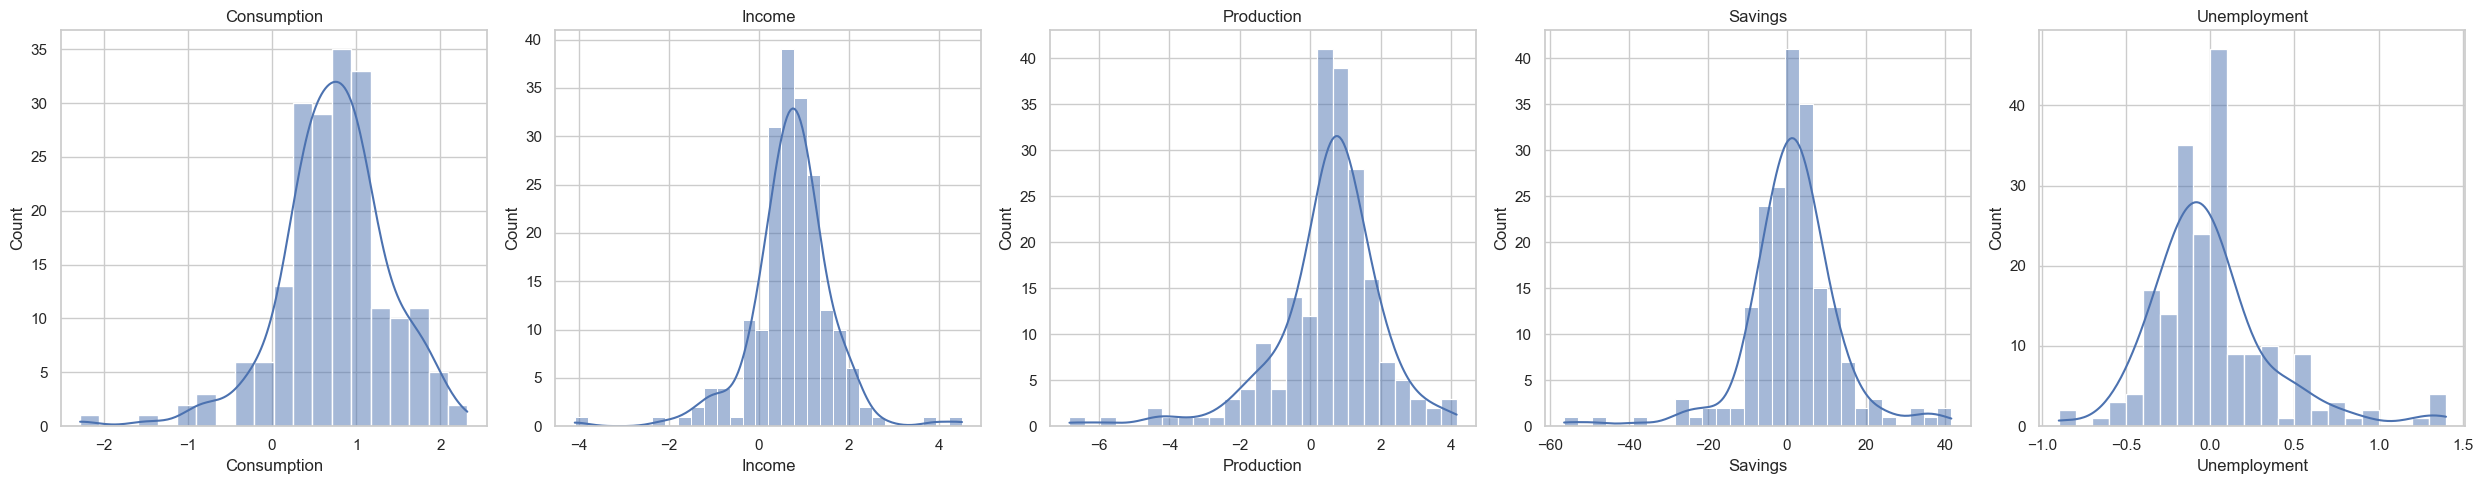

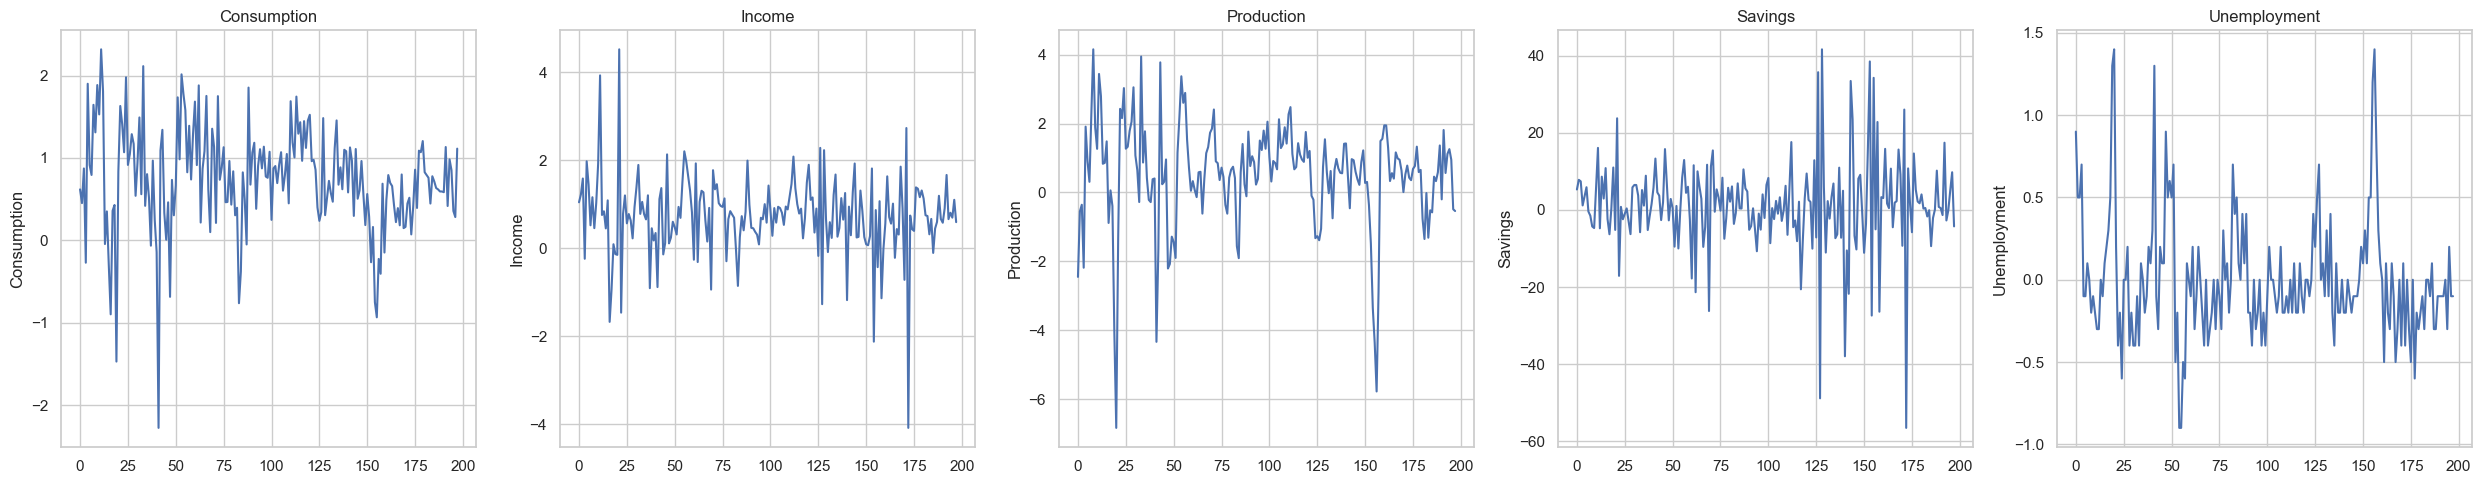

In [14]:
sns.set_theme(style="whitegrid")

fig, axes = plt.subplots(1, 5, figsize=(25, 5))

for i, col in enumerate(df.columns[1:]):
    sns.histplot(df[col], kde=True, ax=axes[i])
    axes[i].set_title(col)

plt.tight_layout()
plt.show()

fig, axes = plt.subplots(1, 5, figsize=(25, 5))

for i, col in enumerate(df.columns[1:]):
    sns.lineplot(df[col], ax=axes[i])
    axes[i].set_title(col)

plt.tight_layout()
plt.show()

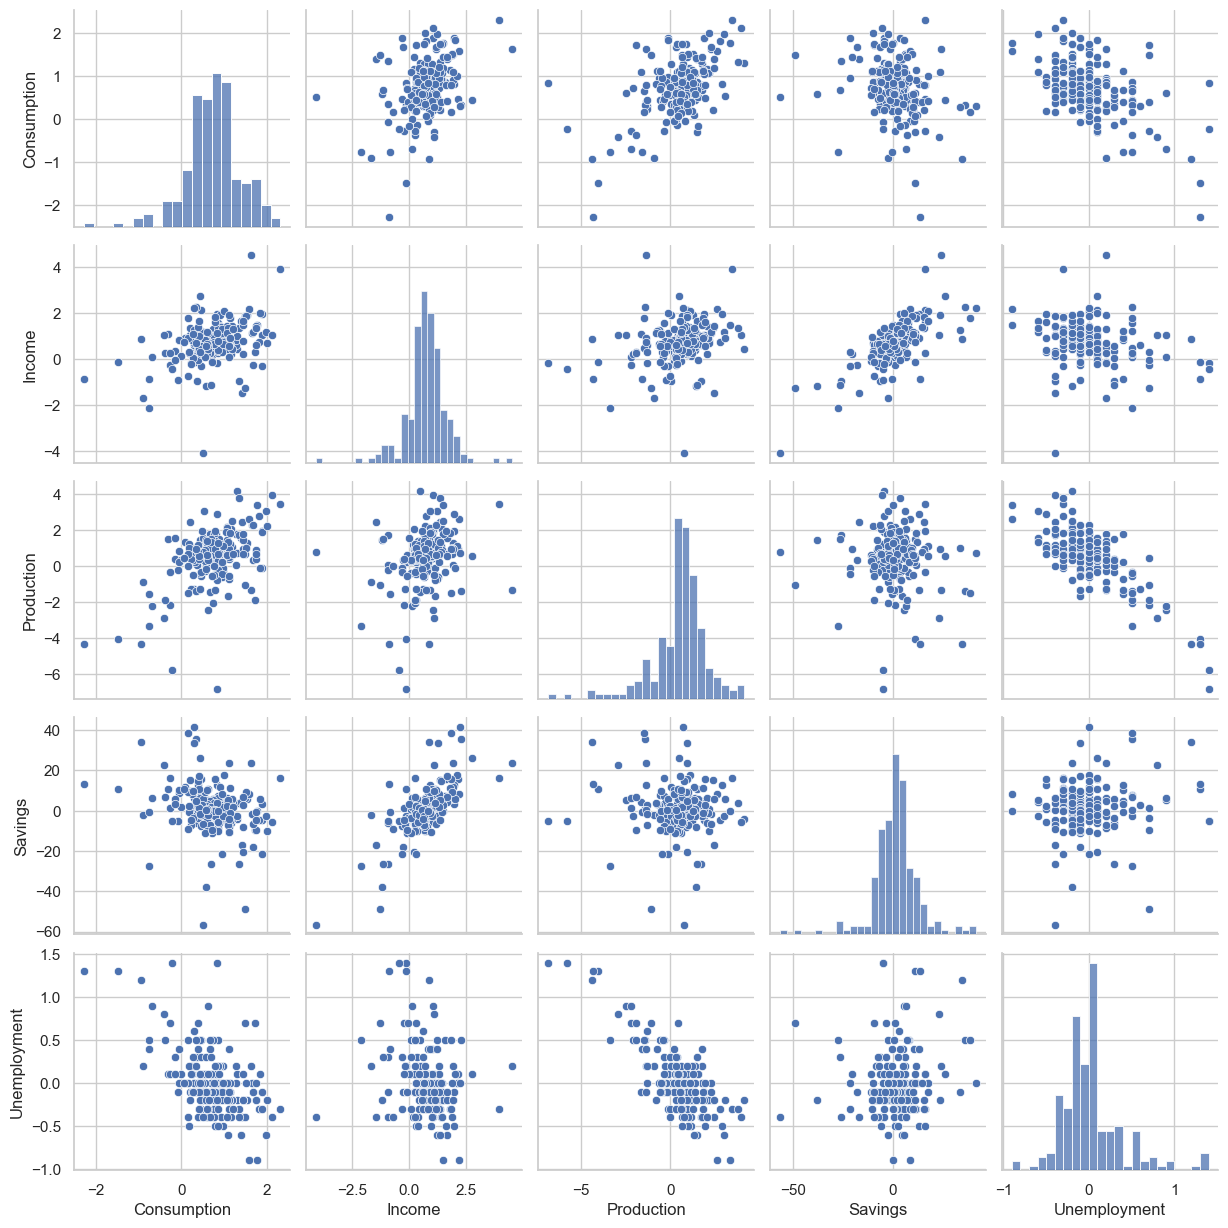

In [15]:
sns.pairplot(df)

<Axes: >

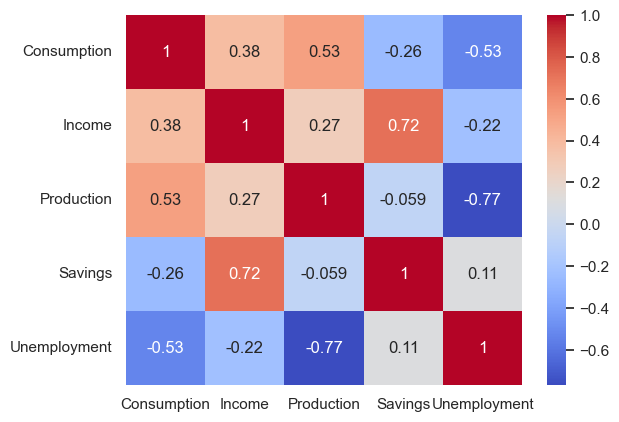

In [16]:
sns.heatmap(df.iloc[:, 1:].corr(), annot=True, cmap='coolwarm')

C:\Users\rodri\AppData\Local\Temp\ipykernel_12752\3982946674.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


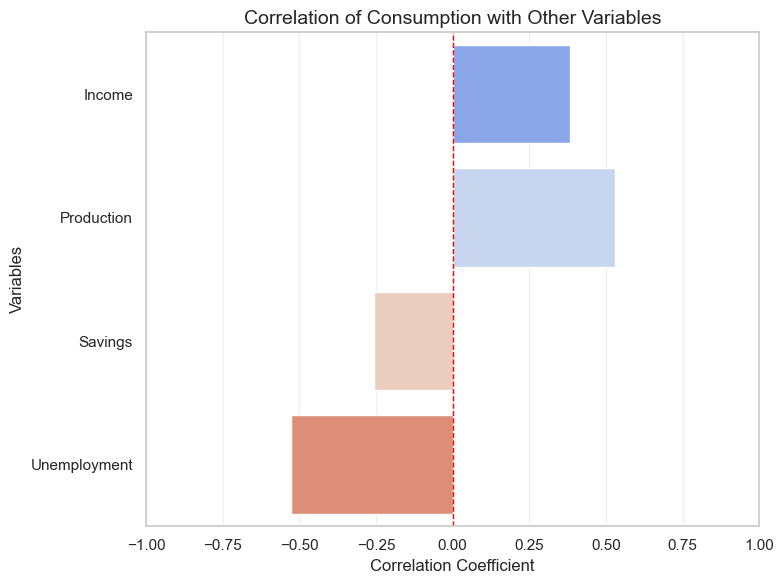

In [17]:
correlation_matrix = df_copy[["Consumption", "Income", "Production", "Savings", "Unemployment"]].corr()

correlation_consumption = correlation_matrix['Consumption'].drop('Consumption')

plt.figure(figsize=(8, 6))
sns.barplot(
    x=correlation_consumption.values,
    y=correlation_consumption.index,
    palette='coolwarm',
    orient='h'
)

plt.title('Correlation of Consumption with Other Variables', fontsize=14)
plt.xlabel('Correlation Coefficient', fontsize=12)
plt.ylabel('Variables', fontsize=12)
plt.xlim(-1, 1)
plt.axvline(0, color='red', linestyle='--', linewidth=1)
plt.grid(axis='x', alpha=0.3)
plt.tight_layout()
plt.show()

In [18]:
df['Date'] = df['Quarter'].copy()
df['Quarter'] = np.arange(len(df))

df.to_csv('us_change_cleaned.csv', index=False)

In [19]:
df.tail()

,Quarter,Consumption,Income,Production,Savings,Unemployment,Date
193,193,0.983112,0.661825,1.117424,-2.723974,0.0,2018 Q2
194,194,0.853181,0.806271,1.256722,-0.085686,-0.3,2018 Q3
195,195,0.356512,0.695142,0.948148,5.031337,0.2,2018 Q4
196,196,0.282885,1.100753,-0.488206,9.760287,-0.1,2019 Q1
197,197,1.113517,0.593399,-0.539949,-4.264616,-0.1,2019 Q2
